In [1]:
import pandas as pd
import numpy as np
import openai
import json

# # our groupings
# seed_hashtags = pd.read_csv("community-grouping_20240809.csv")
# # all hashtags double hit
# dat = pd.read_csv('double_hits_edges_no_dupes.csv')

# open the secrets file
with open('../data/secrets.json') as f:
    secrets = json.load(f)

api_key = secrets['OPENAI_API_KEY_SR']

client = openai.Client(api_key=api_key)

In [26]:
# check rate limits
def check_rate_limits(api_key):
    openai.api_key = api_key

    try:
        # Make a chat completion API call with raw response
        api_response = client.chat.completions.with_raw_response.create(
            model="gpt-4o",  
            messages=[
                {
                    "role": "user",
                    "content": "Hello, this is a test message to check rate limits.",
                }
            ],
        )

        # Access the headers
        headers = api_response.headers

        # Print rate limit information
        print("Rate Limit Information:")
        print(f"Remaining Requests: {headers.get('x-ratelimit-remaining-requests')}")
        print(f"Remaining Tokens: {headers.get('x-ratelimit-remaining-tokens')}")
        print(f"Reset Tokens: {headers.get('x-ratelimit-reset-tokens')}")
        print(f"Reset Requests: {headers.get('x-ratelimit-reset-requests')}")

        # Print the response content
        response = api_response.parse()
        print(f"\nResponse content: {response.choices[0].message.content}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [27]:
check_rate_limits(api_key)

Rate Limit Information:
Remaining Requests: 9999
Remaining Tokens: 1999970
Reset Tokens: 0s
Reset Requests: 6ms

Response content: Hello! If you have any questions or need assistance with something, feel free to let me know. I'm here to help!


---
## IRR reliability with human annotation

In [2]:
def convert_to_tags(input_string):
    # Split the input string into lines
    lines = input_string.strip().split('\n')
    
    # Process each line
    tags = []
    for line in lines:
        # Split each line into words
        words = line.split()
        # Add each word as a tag
        tags.extend(f'{word}' for word in words)
    
    # # Join the tags with commas
    # result = ', '.join(tags)
    
    # Count the total number of tags
    tag_count = len(tags)
    
    return tags, tag_count

# Example input
input_string = """funny	love	depressionandanxiety	alcohol	weed	cognitiveenhancers	opioids	smoking	harmreductionsaveslives	vitamins	fyp	stoned	vaping	kensingtonphilly	medstudent	lgbtqia
addictionhumor	hope	addiction	beers	pot	modafinil	opiates	drinking	soberlife	creatine	greenscreen	high	nicotine	vancouverbc	nurselife	transgender
meme	struggle	opioidaddiction	alchohol	cannabis	nootropics	heroin	drink	druglaws	magnesium	tiktok	wasted	ecig	bayarea	exprostitute	lgbtqtiktok
	kindness	substanceabuse	vodka	greens	nootrostatic	fent	shmokesumthin	drugpolicy	magnesiumglycinate	viral	blackedout	ecigs	toronto	medicalstudent	queergirl
	lovemyself	substanceusedisorder	whiskey	stonersoftiktok	smartdrugs	fentfriday	shmoke	pwud	vitamink	trending	highasfuck	juul	philly	healthcareworkers	queertiktok
	happytobealive	mentalhealth	cocktails	stonervibes	smartpills	xans	shmoketok	pwuds	tylenol	capcut	haf	cigarettes	midwest	socialworkersoftiktok	feralqueer
	trauma	chronicpain	wine	stoner	cerebrolysin	xanny	keepsmokingtheherb	opioidawareness	disprin	duet	shitfaced	vaper	boston	socialworker	whitegirl
	loveyall	chronicpainsufferers	liquor	laganjaestranja		xantok	drinkingtools	opioidcrisis	ayurveda	stitch	tipsy	cigarette	sanfrancisco	frontlineworkers	transtok
	vibes	headache	tequila	420vibes		xandemic	injection	overdoseawareness	tylenoltuesday	fyp„Ç∑„Çöviral	drunk	vape	usa	matnurse	indian
	happy	migraine	booze	dabs		m0lly	injectinguser	overdosecrisis	ibuprofen	fyp„Ç∑	hammered	cig	uk	streetnurse	gaygirl
	gratitude	addicted	chugbeer	wax		molly	inhaler	harmreduction	suplements	foryou	blackout	cigs	canada	nursetiktok	
	fear	bpd	beerfunnel	shmeeds		percs	inhaling	harmreductionworks	coughsyrup	foryoupage	hightimes	tobacco		therapist	
	makesomeonesmile	bpdtiktok	drinkinggames			percoset	keepsmoking	harmreductiontips	overthecounter	foryourpage	gurning	nicotinefein			
		addictionisreal	wildmandrinking			perc30s	inhalation	narcan	ibuprofeno	xyzbca	gurner	nicotinegum			
		ptsd				lean		narcansaveslives	collagen	trend	drunkaf	nicorettepatch			
		depression				leantok		naloxone							
		anxiety				acid		naloxonesaveslives							
		chronicpainwarrior				mescaline		safesupply							
		allergy				pinger		endoverdose							
		infection				pingertok		overdoseresponse							
		allergies				pingtok		stopsmoking							
		seizures				pingerzzzz		smokingkills	addictionhumor
drughumor
recoveryhumor						
		epilespy				emma		quitnicotine							
		insomnia				drank		stopvapping							
		fever				thatdrank		quitvapping							
		cough				bars		sobriety							
		adtiction				30s		sober							
		asthma				40s		soberliving							
		sorethroat				512s		cleanandsober							
		flu				yellows		recovery							
		fluseason				biak		onedayatatime							
		bronchitis				epills		odaat							
		pain				psychedelictok		na							
		inhalantsaddiction				lsdart		detox							
						magicmushroomsadventures		sobrietybirthday							
						libcaps		soberhouse							
						libertycapss		wedorecover							
						thom		relapsehappens							
						nosebeers		methadoneclinic							
						c0deine		naltrexone							
						inhalants		drugrehab							
						whippets		dropthosedates							
						whipit		matsaves							
						balloons		stopthestigma							
						adderral		alcoholfreejourney							
						addy		alcoholic							
								alcoholism																								"""

# Convert and print the result
all_human_tags, count = convert_to_tags(input_string)
print("Converted tags:")
print(all_human_tags)
print(f"\nTotal number of tags: {count}")

Converted tags:
['funny', 'love', 'depressionandanxiety', 'alcohol', 'weed', 'cognitiveenhancers', 'opioids', 'smoking', 'harmreductionsaveslives', 'vitamins', 'fyp', 'stoned', 'vaping', 'kensingtonphilly', 'medstudent', 'lgbtqia', 'addictionhumor', 'hope', 'addiction', 'beers', 'pot', 'modafinil', 'opiates', 'drinking', 'soberlife', 'creatine', 'greenscreen', 'high', 'nicotine', 'vancouverbc', 'nurselife', 'transgender', 'meme', 'struggle', 'opioidaddiction', 'alchohol', 'cannabis', 'nootropics', 'heroin', 'drink', 'druglaws', 'magnesium', 'tiktok', 'wasted', 'ecig', 'bayarea', 'exprostitute', 'lgbtqtiktok', 'kindness', 'substanceabuse', 'vodka', 'greens', 'nootrostatic', 'fent', 'shmokesumthin', 'drugpolicy', 'magnesiumglycinate', 'viral', 'blackedout', 'ecigs', 'toronto', 'medicalstudent', 'queergirl', 'lovemyself', 'substanceusedisorder', 'whiskey', 'stonersoftiktok', 'smartdrugs', 'fentfriday', 'shmoke', 'pwud', 'vitamink', 'trending', 'highasfuck', 'juul', 'philly', 'healthcarewo

In [3]:
import random
import ast

# Read the CSV file
df = pd.read_csv('../data/double_hits_filtered_upper75_nodes.csv')

# Extract the 'node' column and get the count
node_list = df['node'].dropna().tolist()
node_count = len(node_list)
print(f"Total count of nodes: {node_count}")

# Remove occurrences of all_human_tags from node_list
node_list = [node for node in node_list if node not in all_human_tags]

# Get the count of remaining nodes
node_count = len(node_list)
print(f"Total count of nodes after removal: {node_count}")

# Use all remaining nodes instead of random sampling
print(f"Remaining nodes: {node_list}")

Total count of nodes: 14569
Total count of nodes after removal: 14323
Remaining nodes: ['hypehouse', 'spinalfusion', 'woman', 'depressiontreatment', 'cookies', 'foundersday', 'radicallove', 'swifttok', 'doyouknowhowmuchiloveyou', 'pourtoii', 'yamaha', 'narcanwakesemup', 'reefermadness', 'amanitamuscaria', 'beauty', 'nomoredrugs', 'mindfuldrinker', 'adele', 'newports', 'cultmember', 'synthetic', 'wock', 'unodc', 'leftist', 'burnoutrecovery', 'peersupportspecialist', 'nojudgementzone', 'childhoodtrauma', 'anxietydisorder', 'manager', 'musician', 'laidback', 'dontsweatit', 'tiktoksouthafrica', 'introvideo', 'baseballszn', 'fr', 'funnyrecovery', 'aurora', 'wereallgonnahaveagreattime', 'cinematic', 'fentanylawareness💜', 'chips', 'allaboard', 'saved', 'sucker', 'svaporelax', 'drugabuse', 'therapistsofinstagram', 'justthefacts', 'sprite', 'unitedstates', 'burdenofproof', 'findyourstrength', 'heroinrecovery', 'patient', 'youaresomebodythatidontknow', 'movieclips', 'transman', 'gasprices', 'rev

In [4]:
# test new function
# from get_themes import get_theme
# import random
# hashtag_sample = random.sample(node_list, 100)
# hashtag_sample_str = ", ".join(hashtag_sample)

In [6]:
# hashtag_sample_df = pd.DataFrame(hashtag_sample)
# hashtag_sample_df.to_csv("../data/sample500_batch_4o.csv")

In [14]:
# Get themes for the sampled hashtags
# gpt4o : gpt-4o-2024-05-13
# gpt4o-mini: gpt-4o-mini-2024-07-18
# themes = get_theme(hashtag_sample_str, model= "gpt-4o-2024-05-13", client= client)

In [15]:
# print(themes)

{
            "emotions and feelings": ["sorrytomyself", "lifeafterloss", "friendsforever", "prayersneeded", "spiritualawakening", "mydad", "happythursday", "teenagelife", "dailymotivation", "bestfriend", "again", "lossofaparent", "overcomingobstacles"],
            "health conditions": ["hashimotos", "hepatitisc", "addicitonisreal", "menshealth"],
            "alcohol": ["🍻", "smashed"],
            "cannabis": ["zaza"],
            "cognitive enhancement": [],
            "commonly-misused substances": ["druggin"],
            "consumption method": ["nicotinepouche"],
            "awareness and advocacy": ["opiodcrisisawareness", "preventabledeath", "addictionrecoverycoach", "decriminalizenature", "childdeath", "drugcounselor"],
            "other substances": ["birthcontrol", "medicinal", "organic"],
            "platform": ["messytiktok", "duet", "trendingsounds", "tiktokusa"],
            "substance effects": ["euphoriaseason2"],
            "tobacco_nicotine": ["nicotinepouche", 

In [ ]:
# def process_themes(themes_string):
#     try:
#         themes_dict = json.loads(themes_string)
#     except json.JSONDecodeError as e:
#         print(f"Error decoding JSON: {e}")
#         return pd.DataFrame(columns=['Category', 'Hashtag'])

#     # Step 3: Process the dictionary to create a pandas DataFrame
#     data = []
#     for category, hashtags in themes_dict.items():
#         for hashtag in hashtags:
#             data.append({'Category': category, 'Hashtag': hashtag})
    
#     df = pd.DataFrame(data)
#     return df


In [ ]:
# themes_df = process_themes(themes)
# themes_df.to_csv("../data/themes100_gpt4o.csv")

---
## Experiment with chunking

In [13]:
from get_themes import get_theme
import random
import csv
import json

def chunk_and_analyze_hashtags(hashtag_list, model, client, chunk_size=100, output_file='../data/hashtags_themes.csv'):
    # Shuffle the list to ensure random sampling
    random.shuffle(hashtag_list)
    
    # Chunk the list into batches of 100
    chunks = [hashtag_list[i:i + chunk_size] for i in range(0, len(hashtag_list), chunk_size)]
    
    total_hashtags = 0
    
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Theme', 'Hashtag'])  # Write header
        
        for i, chunk in enumerate(chunks):
            # Convert chunk to comma-separated string
            print("length of chunk: ",len(chunk))
            chunk_str = ", ".join(chunk)
            
            # Get themes for this chunk
            themes_str = get_theme(chunk_str, model=model, client=client)
            print(themes_str)
            themes = json.loads(themes_str.replace("'", '"'))
            # Write results to CSV and count hashtags
            chunk_hashtag_count = 0
            for theme, hashtags in themes.items():
                for hashtag in hashtags:
                    csvwriter.writerow([theme, hashtag])
                    chunk_hashtag_count += 1
            
            total_hashtags += chunk_hashtag_count
            print(f"Processed chunk {i+1}/{len(chunks)}. Hashtags in this chunk: {chunk_hashtag_count}")
    
    print(f"Total hashtags processed: {total_hashtags}")
    print(f"Results have been written to {output_file}")
    return total_hashtags

In [ ]:
hashtag_sample = random.sample(node_list, 2000)
results = chunk_and_analyze_hashtags(hashtag_sample, model="gpt-4o-2024-05-13", client=client)

In [5]:
def chunk_and_analyze_hashtags(hashtag_list, model, client, chunk_size=100):
    # Shuffle the list to ensure random sampling
    random.shuffle(hashtag_list)
    
    # Chunk the list into batches of 100
    chunks = [hashtag_list[i:i + chunk_size] for i in range(0, len(hashtag_list), chunk_size)]
    
    all_themes = []
    
    for i, chunk in enumerate(chunks):
        # Convert chunk to comma-separated string
        chunk_str = ", ".join(chunk)
        
        # Get themes for this chunk
        themes = get_theme(chunk_str, model=model, client=client)
        print(f"Processed chunk {i+1}/{len(chunks)}")
        all_themes.extend(themes)
    
    return all_themes



# Sample 2000 hashtags for now
hashtag_sample = random.sample(node_list, 2000)

results = chunk_and_analyze_hashtags(hashtag_sample, model="gpt-4o-2024-05-13", client=client)

In [6]:
for i, themes in enumerate(results):
    print(f"Themes for chunk {i+1}:")
    print(themes)
    print("---")

Themes for chunk 1:
{
            "emotions and feelings": ["sadstory", "relatable", "unfuckyourself", "prayedforthis", "truly", "feliz"],
            "health conditions": ["chronicpainsurvivor", "heds", "burnoutrecovery"],
            "alcohol": ["doublecup"],
            "cannabis": [],
            "cognitive enhancement": ["lionsmane"],
            "commonly-misused substances": ["f3ntanyl", "controlledsubstance"],
            "consumption method": ["smokefree", "dontvape"],
            "awareness and advocacy": ["overdoseawareness💜", "breakthestigma", "addictionrecovery", "mentalhealthawarenessmonth", "methadoneisrecovery💯❤", "fentanylawarenesschallenge", "drugssuck"],
            "other substances": ["creatine", "vuse", "kratomsupport", "pfizer"],
            "platform": ["recoverycoachesoftiktok", "therapistsoftiktok", "duet", "funnyvids", "followformore", "comedy", "makeitcinematic"],
            "substance effects": ["twisted", "hammered"],
            "tobacco_nicotine": ["nic

In [13]:
print(results)

['{\n            "emotions and feelings": ["sadstory", "relatable", "unfuckyourself", "prayedforthis", "truly", "feliz"],\n            "health conditions": ["chronicpainsurvivor", "heds", "burnoutrecovery"],\n            "alcohol": ["doublecup"],\n            "cannabis": [],\n            "cognitive enhancement": ["lionsmane"],\n            "commonly-misused substances": ["f3ntanyl", "controlledsubstance"],\n            "consumption method": ["smokefree", "dontvape"],\n            "awareness and advocacy": ["overdoseawareness💜", "breakthestigma", "addictionrecovery", "mentalhealthawarenessmonth", "methadoneisrecovery💯❤", "fentanylawarenesschallenge", "drugssuck"],\n            "other substances": ["creatine", "vuse", "kratomsupport", "pfizer"],\n            "platform": ["recoverycoachesoftiktok", "therapistsoftiktok", "duet", "funnyvids", "followformore", "comedy", "makeitcinematic"],\n            "substance effects": ["twisted", "hammered"],\n            "tobacco_nicotine": ["nicotine"

In [8]:
# export
import csv

def export_to_csv(results, output_file='hashtags_themes.csv'):
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)
        
        # Write the header
        csvwriter.writerow(['Hashtag', 'Theme'])
        
        # Write all results
        for hashtag_theme_pair in results:
            csvwriter.writerow(hashtag_theme_pair)
    
    print(f"Results have been written to {output_file}")

export_to_csv(results, output_file='../data/hashtags_themes2k.csv')

Results have been written to ../data/hashtags_themes2k.csv


In [9]:
# prompt_template = """"
# Instruction: You are an expert linguist, specializing in content analysis related to substances and drug use. Your task is to semantically categorize phrases or hashtags from TikTok that have been associated with drug-related content. Here are the 17 defined categories:

# 1- emotions and feelings: words and phrases related to emotional states and feelings. For example: love, hope, struggle, kindness, lovemyself, happytobealive, trauma, loveyall, vibes, happy, gratitude, fear, makesomeonesmile, etc.

# 2- medical/Health Conditions: words and phrases related to health issues directly related to substance use, addiction-related health problems, or chronic conditions that may lead to substance use. Tags related to health issues stemming from substance use or conditions that might lead to substance use. For example: depressionandanxiety, addiction, opioidaddiction, substanceabuse, substanceusedisorder, mentalhealth, chronicpain, chronicpainsufferers, headache, migraine, addicted, bpd, bpdtiktok, addictionisreal, ptsd, depression, anxiety, chronicpainwarrior, allergy, infection, seizures, insomnia, fever, cough, adtiction, asthma, sorethroat, flu, fluseason, bronchitis, pain, inhalantsaddiction, etc.  

# 3- alcohol: words related to alcoholic beverages and spirits. This is just about the substances or drinks and not the side effects and consumption methods. For example: alcohol, beers, alchohol, vodka, whiskey, cocktails, wine, liquor, tequila, booze, chugbeer, beerfunnel, drinkinggames, wildmandrinking, etc.

# 4- Cannabis: substances related to marijuana, including recreational and medicinal use. For example: cannabis, weed, pot, greens, stonersoftiktok, stonervibes, stoner, laganjaestranja, 420vibes, dabs, wax, shmeeds, etc.

# 5- cognitive enhancement: substances about nootropics, smart drugs, and methods to improve cognitive function. For example: cognitiveenhancers, modafinil, nootropics, smartdrugs, smartpills, nootrostatic, smartdrugs, smartpills, cerebrolysin, etc.

# 6- commonly-misused substances: substances that are frequently used and misused such as licit and illicit substances. For example: 40s, 30s, opioids, opiates, heroin, fent, fentfriday, xans, xanny, xantok, xandemic, m0lly, m0lly, percs, perc30s, lean, leantok, acid, mescaline, pinger, pingertok, pingtok, pingerzzzz, emma, drank, thatdrank, bars, 30s, 40s, 512s, yellows, biak, epills, psychedelictok, lsdart, magicmushroomsadventures, libcaps, libertycapss, thom, nosebeers, c0deine, inhalants, whippets, whipit, balloons, adderral, addy, etc.

# 7- consumption method: words and phrases that show specific ways in which substances (including alcohol, illicit or licit drugs including tobacco and cannabis) are ingested, administered, or used. For example: smoking, injection, drinking, drink, shmokesumthin, shmoke, shmokesumthin, shmoketok, keepsmokingtheherb, drinkingtools, injection, injectinguser, inhaler, inhaling, inhalation, keepsmoking, etc.

# 8- awareness and advocacy: words related to information and strategies to prevent and raise awareness of substance abuse or reduce associated harm, discussions about drug laws, policies, and related social issues, and content about addiction recovery, sobriety, and support systems. For example: harmreductionsaveslives, soberlife, druglaws, drugpolicy, pwuds, opioidawareness, opioidcrisis, overdoseawareness, overdosecrisis, harmreduction, harmreductionworks, harmreductiontips, narcan, narcansaveslives, naloxone, naloxonesaveslives, safesupply, endoverdose, overdoseresponse, stopsmoking, smokingkills, quitnicotine, stopvapping, quitvapping, sobriety, sober, soberliving, cleanandsober, recovery, onedayatatime, odaat, na, detox, sobrietybirthday, soberhouse, wedorecover, relapsehappens, methadoneclinic, naltrexone, drugrehab, dropthosedates, matsaves, stopthestigma, alcoholfreejourney, alcoholic, alcoholism, etc. 

# 9- Other substances: mentions of less common substances, oftentimes legal, over-the-counter medications, herbal remedies, or supplements. For example: vitamins, suplements, creatine, magnesium, magnesiumglycinate, vitamink, tylenol, disprin, ayurveda, tylenoltuesday, ibuprofen, suplements, coughsyrup, overthecounter, ibuprofeno, collagen, etc.

# 10- platform: tags and features specific to social media engagement, visibility, and trending tactics. For example: fyp, greenscreen, tiktok, viral, trending, capcut, duet, stitch, fyp„Ç∑„Çöviral, fyp„Ç∑, foryou, foryoupage, foryourpage, xyzbca, trend, etc.

# 11- substance effects: words and phrases that describe the physical or mental effects of substance or alcohol use. This includes both desired effects and side effects. For example: stoned, high, wasted, blackedout, blackedout, highasfuck, haf, shitfaced, tipsy, drunk, hammered, blackout, hightimes, gurning, gurner, drunkaf, etc.

# 12- tobacco/nicotine: words related to tobacco products, cigarettes, vaping, and nicotine use. For example: vaping, nicotine, ecig, ecigs, juul, cigarettes, vaper, cigarette, vape, cig, cigs, tobacco, nicotinefein, nicotinegum, nicorettepatch, etc.

# 13- humor: words, phrases, or hashtags related to jokes, memes, or any content meant to be funny but specific to substance use, addiction, or recovery. For example: addictionhumor, drughumor, recoveryhumor, etc.

# 14- location: words related to geographcial locations, it could be city, state, country, or continent. For example: kensingtonphilly, vancouverbc, bayarea, toronto, philly, midwest, boston, sanfrancisco, usa, uk, canada, etc.

# 15- occupation: words related to occupations or professions. For example: medstudent, nurselife, exprostitute, medicalstudent, healthcareworkers, socialworkersoftiktok, socialworker, frontlineworkers, matnurse, streetnurse, nursetiktok, therapist, etc.

# 16- identity-based risk groups: Hashtags related to any social identity, demographic group, or community affiliation that have faced or may currently experience marginalization, stigmatization, stereotyping, or labeling. This includes, but is not limited to, dimensions such as race, ethnicity, gender identity, sexual orientation, disability status, socioeconomic background, immigration status, religion, age group, or membership in specific subcultures. For example: lgbtqia, transgender, lgbtqtiktok, queergirl, queertiktok, feralqueer, whitegirl, transtok, indian, gaygirl, etc.

# 17- misc: Any tag that does not fit into the above categories. 

# Task: Categorize the hashtag provided below into exactly one of the 17 categories: cannabis, cognitive enhancement, platform, tobacco/nicotine, emotions and feelings, commonly-misused substances, other substances, substance effects, alcohol, consumption method, medical/health conditions, awareness and advocacy, Identity-Based Risk Groups, humor, location, occupation, and misc.

# Notes: 
# Do not make new categories and only use the ones provided to you. 
# Some words may be misspelled, consider the correct spelling of the word when classifying but do not change the spellings of the hashtag or words in the result. 
# Do not give any explanations. 
# Slangs and euphemisms are present in this list, pointing to various types of illicit and licit drugs or using cannabis and other substances, for instance, drank, 40s, 30s (common substances), shmoke (consuming).  Take this into consideration when labeling the words. 
# Acronyms may be present in the set for instance NA representing Narcotics Anonymous.
# If the word is substance-specific, categorize it under the specific substance category. 
# If the word is a consumption method for instance drink, prioritize the "Consumption Method" category and not the substance or alcohol category. 

# Present your results in a clear, organized format, listing the assigned category of the current hashtag: "Category: (the predicted category)"

# Hashtag: {hashtag}
# """

In [ ]:
# from tqdm import tqdm
# import time  # Import time for sleep functionality

# def classify_hashtag(hashtag, client, model):
#     prompt = prompt_template.format(hashtag=hashtag)
#     while True:  # Retry loop
#         try:
#             response = client.chat.completions.create(
#                 messages=[
#                     {
#                         "role": "system",
#                         "content": prompt
#                     }
#                 ],
#                 model=model,
#                 temperature=0
#             )
#             return response.choices[0].message.content.strip()
#         except openai.error.OpenAIError as e:  # Catch OpenAI errors
#             print(f"Error: {e}. Retrying in 5 seconds...")
#             time.sleep(5)  # Wait before retrying

# # Get the list of hashtags
# hashtags = node_list

# # Initialize a dictionary to store results
# results = {}

# # Classify each hashtag
# for hashtag in tqdm(hashtags, desc="Classifying hashtags", unit="hashtag"):
#     classification = classify_hashtag(hashtag, client, "gpt-4o")
#     results[hashtag] = classification
#     # print(hashtag, classification)

# # Convert results to a DataFrame
# df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Category'])
# df_results.index.name = 'Hashtag'
# df_results.reset_index(inplace=True)

# # Save results to CSV
# df_results.to_csv('gpt_hashtag_classifications_14k.csv', index=False)
# print("Classifications saved to gpt_hashtag_classifications.csv")

# # Display the first few results
# print(df_results.head())

In [ ]:
# from tqdm import tqdm

# def classify_hashtag(hashtag, client, model):
#     prompt = prompt_template.format(hashtag=hashtag)
#     response = client.chat.completions.create(
#         messages=[
#             {
#                 "role": "system",
#                 "content": prompt
#             }
#         ],
#         model=model,
#         temperature=0
#     )
#     return response.choices[0].message.content.strip()

# # Get the list of hashtags
# hashtags = node_list

# # Initialize a dictionary to store results
# results = {}

# # Classify each hashtag
# for hashtag in tqdm(hashtags, desc="Classifying hashtags", unit="hashtag"):
#     classification = classify_hashtag(hashtag, client, "gpt-4o")
#     results[hashtag] = classification
#     # print(hashtag, classification)


# # Convert results to a DataFrame
# df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Category'])
# df_results.index.name = 'Hashtag'
# df_results.reset_index(inplace=True)

# # Save results to CSV
# df_results.to_csv('gpt_hashtag_classifications_14k.csv', index=False)
# print("Classifications saved to gpt_hashtag_classifications.csv")

# # Display the first few results
# print(df_results.head())

In [10]:
import pandas as pd
import re

# Create a new DataFrame from the results dictionary
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['full_text'])
df_results.index.name = 'hashtag'
df_results.reset_index(inplace=True)

# Extract the category from the full text
df_results['category'] = df_results['full_text'].str.extract(r'Category:\s*(.*)')

# Drop the full_text column as it's no longer needed
df_results.drop('full_text', axis=1, inplace=True)

# Display the first few rows of the new DataFrame
print(df_results.head())

# Save results to CSV if needed
df_results.to_csv('gpt_hashtag_classifications_14k.csv', index=False)
print("Classifications saved to gpt_hashtag_classifications.csv")

               hashtag                        category
0            hypehouse                        Platform
1         spinalfusion       Medical/Health Conditions
2                woman  identity and group affiliation
3  depressiontreatment       Medical/Health Conditions
4              cookies                            misc
Classifications saved to gpt_hashtag_classifications.csv


/var/folders/qt/t2b9s_wx7tz_l0j9rvmdy__r0000gq/T/ipykernel_8918/3633297060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


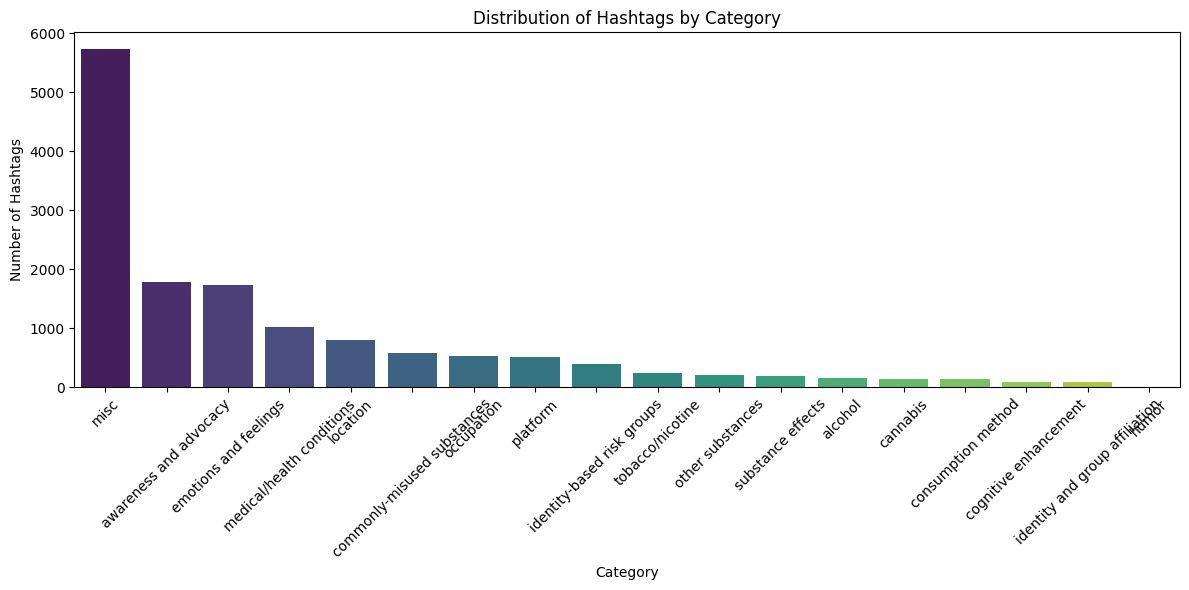

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('gpt_hashtag_classifications_14k.csv')
df['category'] = df['category'].str.lower()
# Count the occurrences of each category
category_counts = df['category'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Hashtags by Category')
plt.xlabel('Category')
plt.ylabel('Number of Hashtags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Summary statistics
summary_stats = df['category'].value_counts().reset_index()
summary_stats.columns = ['Category', 'Count']
summary_stats['Percentage'] = (summary_stats['Count'] / summary_stats['Count'].sum()) * 100

# Display summary statistics
print(summary_stats)

                          Category  Count  Percentage
0                             misc   5729   39.862232
1           awareness and advocacy   1790   12.454773
2            emotions and feelings   1738   12.092959
3        medical/health conditions   1014    7.055385
4                         location    792    5.510715
5      commonly-misused substances    588    4.091289
6                       occupation    536    3.729474
7                         platform    519    3.611188
8       identity-based risk groups    393    2.734484
9                 tobacco/nicotine    247    1.718620
10                other substances    211    1.468132
11               substance effects    183    1.273309
12                         alcohol    164    1.141108
13                        cannabis    147    1.022822
14              consumption method    143    0.994990
15           cognitive enhancement     94    0.654050
16  identity and group affiliation     83    0.577512
17                          

In [6]:
import pandas as pd

# Read the original CSV file
df = pd.read_csv("Theme_and_Hashtag_Data_human_without_examples.csv")

# Create a new list to store the converted data
new_data = []

# Iterate through each column (theme) in the DataFrame
for category in df.columns:
    # Get all non-null hashtags for this theme
    hashtags = df[category].dropna()
    
    # Add each hashtag and its theme to the new data list
    for hashtag in hashtags:
        new_data.append({"hashtag": hashtag, "category": category})

# Create a new DataFrame from the converted data
new_df = pd.DataFrame(new_data)

# Save the new DataFrame to a CSV file
new_df.to_csv("human_hashtag_classifications.csv", index=False)

print("Conversion complete. New file saved as 'human_hashtag_classifications.csv'")

Conversion complete. New file saved as 'human_hashtag_classifications.csv'


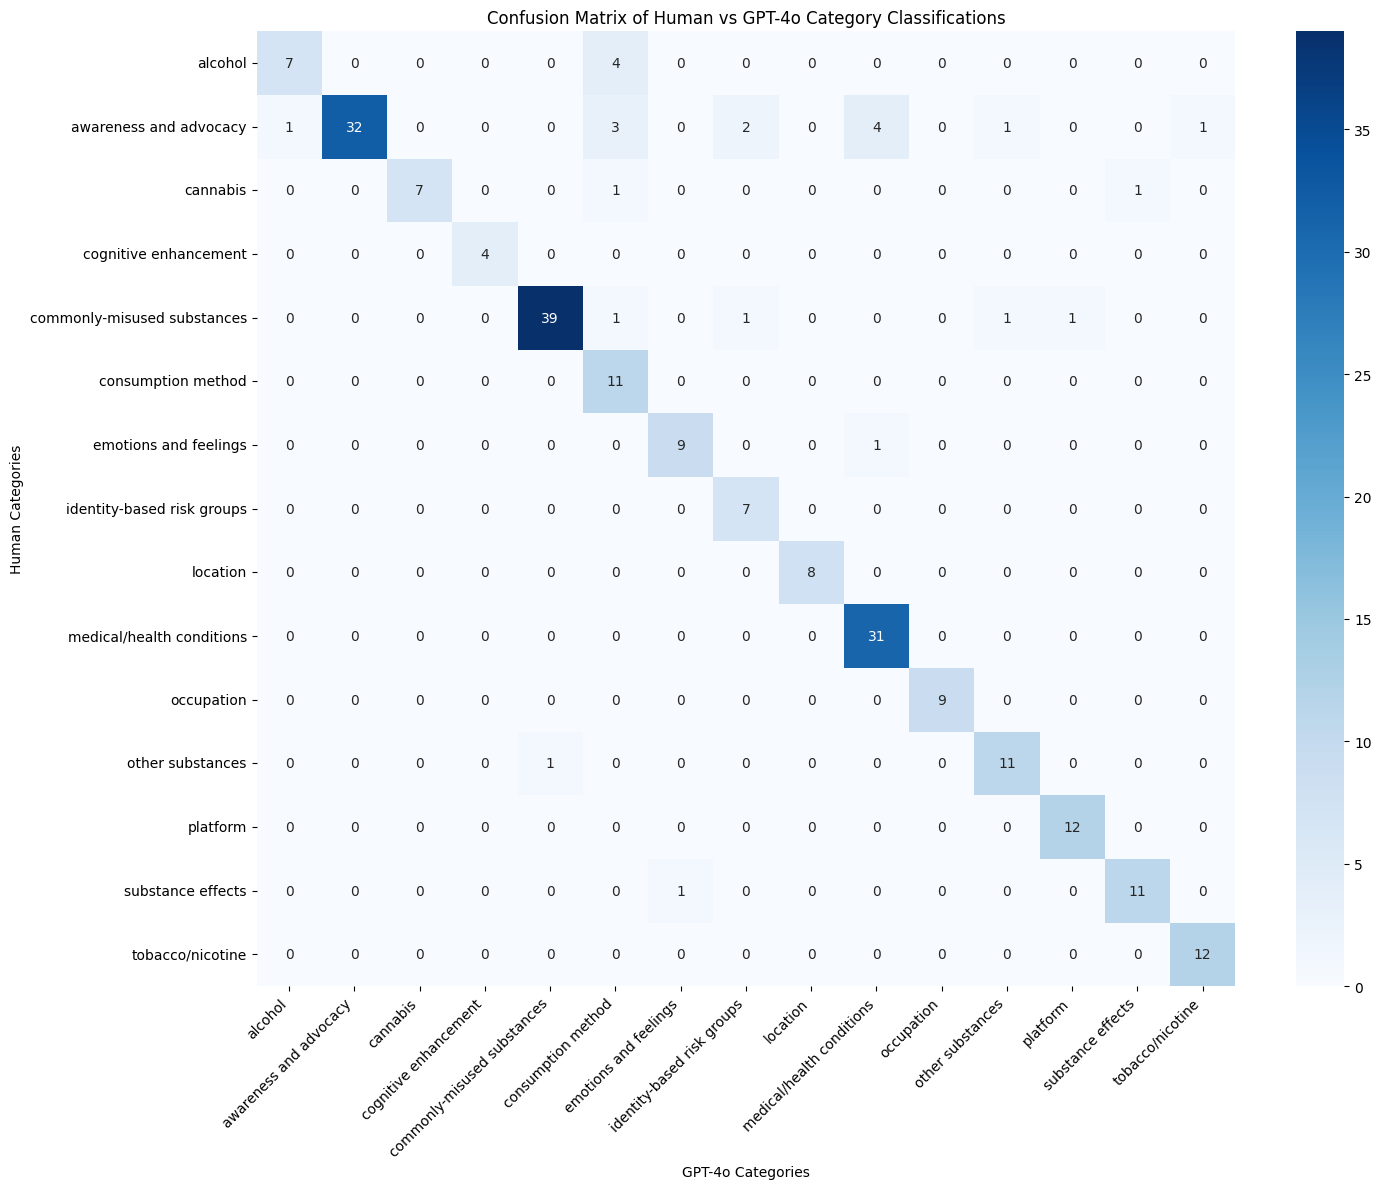

Confusion Matrix:
                             alcohol  awareness and advocacy  cannabis  \
alcohol                            7                       0         0   
awareness and advocacy             1                      32         0   
cannabis                           0                       0         7   
cognitive enhancement              0                       0         0   
commonly-misused substances        0                       0         0   
consumption method                 0                       0         0   
emotions and feelings              0                       0         0   
identity-based risk groups         0                       0         0   
location                           0                       0         0   
medical/health conditions          0                       0         0   
occupation                         0                       0         0   
other substances                   0                       0         0   
platform            

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the datasets
human_df = pd.read_csv("human_hashtag_classifications.csv")
gpt_df = pd.read_csv("gpt_hashtag_classifications_ground_truth.csv")

# Convert categories to lowercase for both DataFrames and replace NaN with a placeholder
human_df['category'] = human_df['category'].fillna('unknown').str.lower()
gpt_df['category'] = gpt_df['category'].fillna('unknown').str.lower()

# Apply the category mapping to the GPT DataFrame
category_mapping = {
    'platform engagement': 'platform',
    'commonly misused substances': 'commonly-misused substances'
}
gpt_df['category'] = gpt_df['category'].replace(category_mapping)

# Merge the datasets
merged_df = pd.merge(human_df, gpt_df, on='hashtag', how='left', suffixes=('_human', '_gpt'))

# Replace any remaining NaN values with 'unknown'
merged_df['category_human'] = merged_df['category_human'].fillna('unknown')
merged_df['category_gpt'] = merged_df['category_gpt'].fillna('unknown')

# Get all unique categories
all_categories = sorted(set(merged_df['category_human'].unique()) | set(merged_df['category_gpt'].unique()))

# Create the confusion matrix
cm = confusion_matrix(
    merged_df['category_human'],
    merged_df['category_gpt'],
    labels=all_categories
)

# Calculate overall accuracy
overall_accuracy = accuracy_score(merged_df['category_human'], merged_df['category_gpt'])

# Calculate accuracy for each category
category_accuracies = {}
for category in all_categories:
    category_mask = merged_df['category_human'] == category
    category_accuracy = accuracy_score(
        merged_df.loc[category_mask, 'category_human'],
        merged_df.loc[category_mask, 'category_gpt']
    )
    category_accuracies[category] = category_accuracy

# Create a heatmap of the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_categories, yticklabels=all_categories)
plt.title('Confusion Matrix of Human vs GPT-4o Category Classifications')
plt.xlabel('GPT-4o Categories')
plt.ylabel('Human Categories')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(pd.DataFrame(cm, index=all_categories, columns=all_categories))

# Print overall accuracy
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

# Print accuracy for each category
print("\nAccuracy by Category:")
for category, accuracy in sorted(category_accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f"{category}: {accuracy:.4f}")

In [12]:
# Save the merged DataFrame to a CSV file
output_file = 'merged_hashtag_classifications.csv'
merged_df.to_csv(output_file, index=False)
print(f"\nMerged dataset saved to {output_file}")


Merged dataset saved to merged_hashtag_classifications.csv


In [27]:
print("Human categories:", sorted(human_df['category'].unique()))
print("GPT categories:", sorted(gpt_df['category'].unique()))

Human categories: ['alcohol', 'awareness and advocacy', 'cannabis', 'cognitive enhancement', 'commonly-misused substances', 'consumption method', 'emotions and feelings', 'humor', 'identity-based risk groups', 'location', 'medical/health conditions', 'occupation', 'other substances', 'platform', 'substance effects', 'tobacco/nicotine']
GPT categories: ['alcohol', 'awareness and advocacy', 'cannabis', 'cognitive enhancement', 'commonly-misused substances', 'consumption method', 'emotions and feelings', 'identity-based risk groups', 'location', 'medical/health conditions', 'occupation', 'other substances', 'platform', 'substance effects', 'tobacco/nicotine']


In [13]:
human_categories = set(human_df['category'].str.lower())
gpt_categories = set(gpt_df['category'].str.lower())

print("Categories in human but not in GPT:", human_categories - gpt_categories)
print("Categories in GPT but not in human:", gpt_categories - human_categories)
print("Common categories:", human_categories.intersection(gpt_categories))

Categories in human but not in GPT: set()
Categories in GPT but not in human: set()
Common categories: {'substance effects', 'tobacco/nicotine', 'alcohol', 'emotion', 'cognitive enhancement', 'drug policy/law', 'cannabis', 'other substances', 'recovery', 'consumption method', 'commonly-misused substances', 'humor', 'prevention/harm reduction', 'platform', 'medical/health conditions'}


In [14]:
import pandas as pd

# Load the datasets
human_df = pd.read_csv("converted_Theme_and_Hashtag_Data_human.csv")
gpt_df = pd.read_csv("cleaned_categories.csv")

# Find the extra tag
extra_tag = set(human_df['Hashtag']) - set(gpt_df['Tag'])

if extra_tag:
    print(f"Extra tag in human dataset: {extra_tag}")
else:
    print("No extra tags found in the human dataset.")

# Merge the datasets
merged_df = pd.merge(human_df, gpt_df, left_on='Hashtag', right_on='Tag', how='left')

# Calculate accuracy
total_tags = len(merged_df)
matching_tags = (merged_df['Theme'] == merged_df['Category']).sum()
accuracy = matching_tags / total_tags

print(f"\nTotal tags: {total_tags}")
print(f"Matching tags: {matching_tags}")
print(f"Accuracy: {accuracy:.2%}")

# Save the merged dataset
merged_df.to_csv("merged_hashtag_categories.csv", index=False)
print("\nMerged dataset saved as 'merged_hashtag_categories.csv'")

# Display tags with mismatched categories
mismatched_tags = merged_df[merged_df['Theme'] != merged_df['Category']]
print("\nTags with mismatched categories:")
print(mismatched_tags[['Hashtag', 'Theme', 'Category']])

Extra tag in human dataset: {'na', 'naloxone', 'fypシ゚viral', 'fypシ'}

Total tags: 250
Matching tags: 0
Accuracy: 0.00%

Merged dataset saved as 'merged_hashtag_categories.csv'

Tags with mismatched categories:
            Hashtag             Theme  Category
0             funny             Humor       NaN
1    addictionhumor             Humor       NaN
2              meme             Humor       NaN
3              love           Emotion       NaN
4              pain           Emotion       NaN
..              ...               ...       ...
245         tobacco  tobacco/nicotine       NaN
246        nicotine  tobacco/nicotine       NaN
247    nicotinefein  tobacco/nicotine       NaN
248     nicotinegum  tobacco/nicotine       NaN
249  nicorettepatch  tobacco/nicotine       NaN

[250 rows x 3 columns]


In [65]:
import pandas as pd
import re

def parse_categorized_data(data):
    categories = {}
    current_category = None
    for line in data.split('\n'):
        line = line.strip()
        if re.match(r'\d+\.\s+\*\*.*\*\*:', line):
            current_category = re.search(r'\*\*(.*?)\*\*', line).group(1).strip()
            categories[current_category] = []
        elif line.startswith('- '):
            hashtag = line.strip('- ').strip()
            if current_category:
                categories[current_category].append(hashtag)
    return categories

def convert_to_csv_format(categorized_data, all_tags_string):
    categories = parse_categorized_data(categorized_data)
    
    # Get all tags from the original list
    all_tags = [tag.strip() for tag in all_tags_string.split('\n') if tag.strip()]
    
    df = pd.DataFrame(0, index=all_tags, columns=list(categories.keys()))
    
    for category, hashtags in categories.items():
        df.loc[df.index.isin(hashtags), category] = 1
    
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Node'}, inplace=True)
    
    return df

# Assuming the categorized data is stored in the 'label' variable
# and all_tags is the string containing all tags

# Convert the categorized data to CSV format
result_df = convert_to_csv_format(label, all_tags)

# Save the result to a CSV file
output_file = 'categorized_hashtags_0815.csv'
result_df.to_csv(output_file, index=False)

print(f"Converted CSV saved to {output_file}")
print(f"Number of rows in output file: {len(result_df)}")
print(f"Number of columns in output file: {len(result_df.columns)}")

# Display the first few rows of the resulting DataFrame
print(result_df.head())

Converted CSV saved to categorized_hashtags_0815.csv
Number of rows in output file: 250
Number of columns in output file: 15
       Node  cannabis  platform engagement  cognitive enhancement  \
0       30s         0                    0                      0   
1       40s         0                    0                      0   
2  420vibes         1                    0                      0   
3      512s         0                    0                      0   
4      acid         0                    0                      0   

   tobacco/nicotine  drug policy/law  recovery  emotion/humor  \
0                 0                0         0              0   
1                 0                0         0              0   
2                 0                0         0              0   
3                 0                0         0              0   
4                 0                0         0              0   

   commonly misused substances  other substances  substance effects  

In [4]:
def convert_csv_format(input_file, output_file):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Get categories (all column names)
    categories = df.columns.tolist()

    # Get all unique hashtags from all columns
    all_hashtags = set()
    for category in categories:
        all_hashtags.update(df[category].dropna())
    all_hashtags = sorted(list(all_hashtags))

    print(f"Number of unique hashtags: {len(all_hashtags)}")

    # Create a new DataFrame with hashtags as index and categories as columns
    new_df = pd.DataFrame(index=all_hashtags, columns=categories)

    # Fill the new DataFrame with 1s and 0s
    for category in categories:
        category_hashtags = set(df[category].dropna())
        new_df[category] = new_df.index.isin(category_hashtags).astype(int)

    # Reset index to make hashtags a column
    new_df.reset_index(inplace=True)
    new_df.rename(columns={'index': 'Node'}, inplace=True)

    # Save the new DataFrame to a CSV file
    new_df.to_csv(output_file, index=False)

    print(f"Converted CSV saved to {output_file}")
    print(f"Number of rows in output file: {len(new_df)}")
    print(f"Number of columns in output file: {len(new_df.columns)}")

# Example usage
input_file = 'community_grouping_gpt.csv'
output_file = 'gpt_grouping.csv'
convert_csv_format(input_file, output_file)

Number of unique hashtags: 209
Converted CSV saved to gpt_grouping.csv
Number of rows in output file: 209
Number of columns in output file: 15


In [45]:
# used chatgpt to convert the string output above to community_grouping_gpt.csv and reformat the original seed hashtag csv
human = pd.read_csv("converted_grouping_format.csv")
gpt = pd.read_csv("categorized_hashtags_0815.csv")

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score

# Load the datasets
human = pd.read_csv("converted_grouping_format.csv")
gpt = pd.read_csv("categorized_hashtags_0815.csv")

# Ensure column names are lowercase and sorted
human.columns = human.columns.str.lower()
gpt.columns = gpt.columns.str.lower()
human = human.reindex(sorted(human.columns), axis=1)
gpt = gpt.reindex(sorted(gpt.columns), axis=1)

# Function to calculate Cohen's Kappa and IRR for each category
def calculate_metrics(human_df, gpt_df):
    results = []
    for col in human_df.columns:
        if col in gpt_df.columns and col != 'node':
            human_values = human_df[col].values
            gpt_values = gpt_df[col].values
            
            # Calculate Cohen's Kappa
            kappa = cohen_kappa_score(human_values, gpt_values)
            
            # Calculate IRR (simple agreement)
            accuracy = np.mean(human_values == gpt_values)
            
            results.append({
                "Category": col,
                "Cohen_Kappa": kappa,
                "Accuracy": accuracy
            })
    
    return pd.DataFrame(results)

# Calculate metrics
metrics = calculate_metrics(human, gpt)

# Sort results by Cohen's Kappa
metrics_sorted = metrics.sort_values("Cohen_Kappa", ascending=False)

# Display results
print("Metrics by Category:")
print(metrics_sorted)

# Calculate overall metrics
all_human_values = human.drop(columns=['node']).values.flatten()
all_gpt_values = gpt.drop(columns=['node']).values.flatten()

overall_kappa = cohen_kappa_score(all_human_values, all_gpt_values)
overall_irr = np.mean(all_human_values == all_gpt_values)

print(f"\nOverall Cohen's Kappa: {overall_kappa}")
print(f"Overall Accuracy: {overall_irr}")

Metrics by Category:
                       Category  Cohen_Kappa  Accuracy
12            substance effects     0.924357     0.992
13             tobacco/nicotine     0.890190     0.988
2         cognitive enhancement     0.870934     0.992
7     medical/health conditions     0.799197     0.960
8              other substances     0.759285     0.972
0                       alcohol     0.716634     0.968
1                      cannabis     0.688020     0.976
5               drug policy/law     0.663073     0.992
10    prevention/harm reduction     0.663073     0.956
9                      platform     0.651811     0.968
11                     recovery     0.647887     0.960
4            consumption method     0.594419     0.960
3   commonly-misused substances     0.542993     0.892
6                       emotion     0.371016     0.940

Overall Cohen's Kappa: 0.6961979913916786
Overall Accuracy: 0.9654285714285714


In [50]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the datasets
human = pd.read_csv("converted_grouping_format.csv")
gpt = pd.read_csv("categorized_hashtags_0815.csv")

# Ensure column names are lowercase and sorted
human.columns = human.columns.str.lower()
gpt.columns = gpt.columns.str.lower()
human = human.reindex(sorted(human.columns), axis=1)
gpt = gpt.reindex(sorted(gpt.columns), axis=1)

# Function to calculate confusion matrix and accuracy for each category
def calculate_metrics(human_df, gpt_df):
    results = []
    for col in human_df.columns:
        if col in gpt_df.columns and col != 'node':
            human_values = human_df[col].values
            gpt_values = gpt_df[col].values
            
            # Calculate confusion matrix
            cm = confusion_matrix(human_values, gpt_values)
            
            # Calculate accuracy
            acc = accuracy_score(human_values, gpt_values)
            
            results.append({
                "Category": col,
                "Confusion_Matrix": cm,
                "Accuracy": acc
            })
    
    return results

# Calculate metrics
metrics = calculate_metrics(human, gpt)

# Display results
for result in metrics:
    print(f"\nCategory: {result['Category']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Confusion Matrix:")
    cm = result['Confusion_Matrix']
    print(f"    GPT")
    print(f"      0     1")
    print(f"H 0 [{cm[0][0]:4d} {cm[0][1]:4d}]")
    print(f"U 1 [{cm[1][0]:4d} {cm[1][1]:4d}]")

# Calculate overall accuracy
all_human_values = human.drop(columns=['node']).values.flatten()
all_gpt_values = gpt.drop(columns=['node']).values.flatten()
overall_accuracy = accuracy_score(all_human_values, all_gpt_values)

print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

# Calculate overall confusion matrix
overall_cm = confusion_matrix(all_human_values, all_gpt_values)
print("\nOverall Confusion Matrix:")
print(f"    GPT")
print(f"      0     1")
print(f"H 0 [{overall_cm[0][0]:4d} {overall_cm[0][1]:4d}]")
print(f"U 1 [{overall_cm[1][0]:4d} {overall_cm[1][1]:4d}]")


Category: alcohol
Accuracy: 0.9680
Confusion Matrix:
    GPT
      0     1
H 0 [ 231    2]
U 1 [   6   11]

Category: cannabis
Accuracy: 0.9760
Confusion Matrix:
    GPT
      0     1
H 0 [ 237    1]
U 1 [   5    7]

Category: cognitive enhancement
Accuracy: 0.9920
Confusion Matrix:
    GPT
      0     1
H 0 [ 241    0]
U 1 [   2    7]

Category: commonly-misused substances
Accuracy: 0.8920
Confusion Matrix:
    GPT
      0     1
H 0 [ 203    2]
U 1 [  25   20]

Category: consumption method
Accuracy: 0.9600
Confusion Matrix:
    GPT
      0     1
H 0 [ 232    4]
U 1 [   6    8]

Category: drug policy/law
Accuracy: 0.9920
Confusion Matrix:
    GPT
      0     1
H 0 [ 246    0]
U 1 [   2    2]

Category: emotion
Accuracy: 0.9400
Confusion Matrix:
    GPT
      0     1
H 0 [ 230    4]
U 1 [  11    5]

Category: medical/health conditions
Accuracy: 0.9600
Confusion Matrix:
    GPT
      0     1
H 0 [ 217    2]
U 1 [   8   23]

Category: other substances
Accuracy: 0.9720
Confusion Matrix:
 

In [53]:
import re

def parse_and_print_categories(data):
    categories = {}
    current_category = None
    
    for line in data.split('\n'):
        line = line.strip()
        if re.match(r'\d+\.\s+\*\*.*\*\*:', line):
            current_category = re.search(r'\*\*(.*?)\*\*', line).group(1).strip()
            categories[current_category] = []
        elif line.startswith('- '):
            hashtag = line.strip('- ').strip()
            if current_category:
                categories[current_category].append(hashtag)
    
    # Print the parsed data
    for category, hashtags in categories.items():
        print(f"\n{category}:")
        for hashtag in sorted(hashtags):
            print(f"   {hashtag}")

# Assuming the categorized data is stored in the 'label' variable
parse_and_print_categories(label)


cannabis:
   420vibes
   cannabis
   keepsmokingtheherb
   pot
   shmeeds
   stonersoftiktok
   stonervibes
   weed

platform engagement:
   foryou
   foryoupage
   foryourpage
   fyp
   fyp„ç∑
   fyp„ç∑„çöviral
   tiktok
   trending
   viral
   xyzbca

cognitive enhancement:
   adderral
   cognitiveenhancers
   modafinil
   nootropics
   nootrostatic
   smartdrugs
   smartpills

tobacco/nicotine:
   cig
   cigarette
   cigarettes
   ecig
   ecigs
   juul
   nicorettepatch
   nicotine
   nicotinefein
   nicotinegum
   smoking
   vape
   vaper
   vaping

drug policy/law:
   druglaws
   drugpolicy

recovery:
   cleanandsober
   drugrehab
   recovery
   sober
   soberhouse
   soberlife
   soberliving
   sobriety
   sobrietybirthday
   wedorecover

emotion/humor:
   addictionhumor
   funny
   happy
   happytobealive
   makesomeonesmile
   meme
   shmoke
   shmokesumthin
   shmoketok

commonly misused substances:
   balloons
   c0deine
   fent
   fentfriday
   heroin
   inhalants
   inhala

In [57]:
import pandas as pd

# Load the datasets
human = pd.read_csv("converted_grouping_format.csv")
gpt = pd.read_csv("categorized_hashtags_0815.csv")

# Ensure column names are lowercase and sorted
human.columns = human.columns.str.lower()
gpt.columns = gpt.columns.str.lower()
human = human.reindex(sorted(human.columns), axis=1)
gpt = gpt.reindex(sorted(gpt.columns), axis=1)

# Function to get hashtags for a category
def get_hashtags(df, category, limit=10):
    tags = sorted(df[df[category] == 1]['node'])
    return tags[:limit]

# Function to format tags
def format_tags(tags):
    return '\n'.join(f"- {tag}" for tag in tags)

# Compare hashtags for each category
comparison = []
for category in human.columns:
    if category != 'node':
        human_tags = get_hashtags(human, category)
        gpt_tags = get_hashtags(gpt, category)
        
        comparison.append({
            'Category': category,
            'Human Tags': format_tags(human_tags),
            'GPT Tags': format_tags(gpt_tags)
        })

# Print the comparison
for item in comparison:
    print(f"\n{'=' * 80}")
    print(f"Category: {item['Category']}")
    print(f"{'-' * 80}")
    print("Human Tags:                 GPT Tags:")
    print(f"{'-' * 80}")
    human_lines = item['Human Tags'].split('\n')
    gpt_lines = item['GPT Tags'].split('\n')
    max_lines = max(len(human_lines), len(gpt_lines))
    for i in range(max_lines):
        human_tag = human_lines[i] if i < len(human_lines) else ''
        gpt_tag = gpt_lines[i] if i < len(gpt_lines) else ''
        print(f"{human_tag:<30} {gpt_tag}")


Category: alcohol
--------------------------------------------------------------------------------
Human Tags:                 GPT Tags:
--------------------------------------------------------------------------------
- alchohol                     - alcohol
- alcohol                      - alcoholfreejourney
- alcoholfreejourney           - alcoholic
- alcoholic                    - alcoholism
- alcoholism                   - beers
- beerfunnel                   - booze
- beers                        - cocktails
- booze                        - drunk
- chugbeer                     - hammered
- cocktails                    - liquor

Category: cannabis
--------------------------------------------------------------------------------
Human Tags:                 GPT Tags:
--------------------------------------------------------------------------------
- 420vibes                     - 420vibes
- cannabis                     - cannabis
- dabs                         - keepsmokingtheherb
- g

In [48]:
from sklearn.metrics import cohen_kappa_score
import pandas as pd

# Lowercase columns
human.columns = human.columns.str.lower()
gpt.columns = gpt.columns.str.lower()

# Sort columns alphabetically
human = human.reindex(sorted(human.columns), axis=1)
gpt = gpt.reindex(sorted(gpt.columns), axis=1)

# Initialize a list to store the results
kappa_results = []

# Calculate Cohen's Kappa for each pair of columns
for col in human.columns:
    if col in gpt.columns:
        # Extract the entire columns
        human_labels = human[col].dropna()
        gpt_labels = gpt[col].dropna()
        
        # Find the common indices
        common_indices = human_labels.index.intersection(gpt_labels.index)
        
        # Align the labels using common indices
        human_aligned = human_labels.loc[common_indices]
        gpt_aligned = gpt_labels.loc[common_indices]
        
        # Calculate Cohen's Kappa
        kappa_score = cohen_kappa_score(human_aligned, gpt_aligned)
        
        # Append the results to the list
        kappa_results.append({
            "Theme": col,
            "Cohen_Kappa": kappa_score,
            "Sample_Size": len(common_indices)
        })
    else:
        print(f"Skipping column: {col} as it's not present in both datasets.")

# Convert the results to a DataFrame for better readability
df_kappa = pd.DataFrame(kappa_results)

# Sort the results by Cohen's Kappa score in descending order
df_kappa = df_kappa.sort_values("Cohen_Kappa", ascending=False)

# Display the results
print(df_kappa)

                          Theme  Cohen_Kappa  Sample_Size
8                          node     0.991968          250
13            substance effects     0.924357          250
14             tobacco/nicotine     0.890190          250
2         cognitive enhancement     0.870934          250
7     medical/health conditions     0.799197          250
9              other substances     0.759285          250
0                       alcohol     0.716634          250
1                      cannabis     0.688020          250
5               drug policy/law     0.663073          250
11    prevention/harm reduction     0.663073          250
10                     platform     0.651811          250
12                     recovery     0.647887          250
4            consumption method     0.594419          250
3   commonly-misused substances     0.542993          250
6                       emotion     0.371016          250


In [49]:
from sklearn.metrics import cohen_kappa_score

# lowercase cols
human.columns = human.columns.str.lower()
gpt.columns = gpt.columns.str.lower()
# print(human.columns)
# print(gpt.columns)

# Sort columns alphabetically
human = human.reindex(sorted(human.columns), axis=1)
gpt = gpt.reindex(sorted(gpt.columns), axis=1)
# Calculate Cohen's Kappa for each pair of columns
kappa_results = []


# Calculate Cohen's Kappa for each pair of columns
for human_col, gpt_col in zip(human.columns, gpt.columns):
    # print(human_col, gpt_col)
    # Check if the columns are the same
    if human_col == gpt_col:
        
        # Ensure the two columns are compared row by row as individual labels
        human_labels = human[human_col].dropna()
        gpt_labels = gpt[gpt_col].dropna()
        # Find the indices where both human and GPT have labels
        common_indices = human_labels.index.intersection(gpt_labels.index)
        # Calculate Cohen's Kappa
        kappa_score = cohen_kappa_score(human_labels.loc[common_indices], gpt_labels.loc[common_indices])
        
        # Append the results to the list
        kappa_results.append({
            "Theme": human_col,
            "Cohen_Kappa": kappa_score
        })
    else:
        print(f"Skipping columns: {human_col} and {gpt_col} as they do not match.")

# Convert the results to a DataFrame for better readability
df_kappa = pd.DataFrame(kappa_results)

# Display the results
print(df_kappa)


                          Theme  Cohen_Kappa
0                       alcohol     0.716634
1                      cannabis     0.688020
2         cognitive enhancement     0.870934
3   commonly-misused substances     0.542993
4            consumption method     0.594419
5               drug policy/law     0.663073
6                       emotion     0.371016
7     medical/health conditions     0.799197
8                          node     0.991968
9              other substances     0.759285
10                     platform     0.651811
11    prevention/harm reduction     0.663073
12                     recovery     0.647887
13            substance effects     0.924357
14             tobacco/nicotine     0.890190
